# Web Scraping with Python BeautifulSoup

## Import the Libraries

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# create lists to load the extracted data 
titles = []
prices = []
shippings = []
urls = []

In [4]:
import requests
from bs4 import BeautifulSoup

url = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2510209.m570.l1311&_nkw=sport+shorts+men&_sacat=0"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

items = soup.findAll("li", attrs={"class": "s-item"})

for item in items:
    
    title_element = item.select_one(".s-item__title")
    title = title_element.get_text(strip=True) if title_element else "N/A"

    price_element = item.find("span", attrs={"class": "s-item__price"})
    price = price_element.text.strip() if price_element else "N/A"

    shipping_element = item.find("span", attrs={"class": "s-item__shipping s-item__logisticsCost"})
    shipping = shipping_element.text.strip() if shipping_element else "N/A"

    url_element = item.find("a", attrs={"class": "s-item__link"})
    url = url_element["href"] if url_element else "N/A"

   # clean the $ symbol in front of the prices: index 0
    price = price[1:6]
    # append the values into the lists created before the for loop
    titles.append(title)
    prices.append(price)
    shippings.append(shipping)
    urls.append(url)


**Check the scraped information**

In [5]:
print(titles[:5])

['Shop on eBay', "Men's Stretch Golf Shorts Lightweight Quick Dry Zip Pocket Chino Flex Half Pants", 'Sport Shorts Men Sportswear Double-deck Running Shorts 2 in 1 Beach Bottoms', "Men's Sports Shorts GYM Training Bodybuilding Summer Workout Fitness Short Pants", "Men's Basketball Gym Shorts Casual Workout Shorts Drawstring Running Short Pants"]


In [14]:
print(prices[:5])

['20.00', '19.99', '16.00', '11.99', '6.57 ']


In [10]:
print(shippings[:5])

['N/A', '+$14.37 shipping', 'Free International Shipping', 'Shipping not specified', 'Free International Shipping']


In [16]:
print(urls[:5])

['https://ebay.com/itm/123456?hash=item28caef0a3a:g:E3kAAOSwlGJiMikD&amdata=enc%3AAQAHAAAAsJoWXGf0hxNZspTmhb8%2FTJCCurAWCHuXJ2Xi3S9cwXL6BX04zSEiVaDMCvsUbApftgXEAHGJU1ZGugZO%2FnW1U7Gb6vgoL%2BmXlqCbLkwoZfF3AUAK8YvJ5B4%2BnhFA7ID4dxpYs4jjExEnN5SR2g1mQe7QtLkmGt%2FZ%2FbH2W62cXPuKbf550ExbnBPO2QJyZTXYCuw5KVkMdFMDuoB4p3FwJKcSPzez5kyQyVjyiIq6PB2q%7Ctkp%3ABlBMULq7kqyXYA', 'https://www.ebay.com/itm/354649433657?hash=item5292c0e639:g:PssAAOSwbWVkD-x8&amdata=enc%3AAQAIAAAAwLElfVPXDU%2Fz6vd6hVLX%2FSQLClHP8Q%2BVoQ%2BEpflZIppwbthGfyOe9U8QXAdamkOG4DnG3ihmzNk5cCNGnE3CVJl3wkS5%2F02KLW4liSC9V7RC%2BRtg%2F086uVa3zs5Y0fiCmT1qADwgyAOHOjm8wA0xewnQRHMAxQmCLzzmBswrdJTEjU5r859SCnBEvo0M55C21HegWmCfRDaair9qbhajgVNsrxuqAmzvKRDnPuSmkmAIAJ%2FyzNoFsB%2BwZ6R43PUGCA%3D%3D%7Ctkp%3ABlBMUOCgy--OYg', 'https://www.ebay.com/itm/394574141716?hash=item5bde739914:g:hXQAAOSwa0pkPdFl&amdata=enc%3AAQAIAAAAwFCz4iuxlDd7ZLOnfoZMDX5FhRY59asdPq3qkcPuv82Dk7rxwROtfd7s5kRMVXrn55F9wMaiJTFZcsxI4T3QTlM9u%2BY3mfUtKxqKzUon%2FCSgLMat6R8kqppOUV53vp

**Create a csv to load the data**

In [6]:
import csv

# Specify the desired CSV file name
csv_file = "scraped_data.csv"

# Combine the lists into a list of rows
rows = zip(titles, prices, shippings, urls)

# Write the data to the CSV file
with open(csv_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Price", "Shipping", "URL"])  # Write header row
    writer.writerows(rows)  # Write the scraped data rows

print(f"CSV file '{csv_file}' has been created successfully.")

CSV file 'scraped_data.csv' has been created successfully.


In [14]:
df = pd.read_csv("scraped_data.csv")
df.head()

,Title,Price,Shipping,URL
0,Shop on eBay,20.00,NaN,https://ebay.com/itm/123456?hash=item28caef0a3...
1,Men's Stretch Golf Shorts Lightweight Quick Dr...,19.99,+$14.37 shipping,https://www.ebay.com/itm/354649433657?hash=ite...
2,Sport Shorts Men Sportswear Double-deck Runnin...,16.00,Free International Shipping,https://www.ebay.com/itm/394574141716?hash=ite...
3,Men's Sports Shorts GYM Training Bodybuilding ...,11.99,Shipping not specified,https://www.ebay.com/itm/202985690607?hash=ite...
4,Men's Basketball Gym Shorts Casual Workout Sho...,6.57,Free International Shipping,https://www.ebay.com/itm/403858113281?hash=ite...


# Understand the data

In [19]:
df.shape

(76, 4)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     76 non-null     object 
 1   Price     76 non-null     float64
 2   Shipping  75 non-null     object 
 3   URL       76 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


In [24]:
df.Price.describe()

count    76.000000
mean     12.374474
std       6.332098
min       3.200000
25%       7.415000
50%      10.980000
75%      16.092500
max      38.990000
Name: Price, dtype: float64

In [21]:
df.describe(include="object")

,Title,Shipping,URL
count,76,75,76
unique,73,50,76
top,Men's Sports Training Running Bodybuilding Wor...,Free International Shipping,https://ebay.com/itm/123456?hash=item28caef0a3...
freq,3,12,1


In [23]:
for i in df[["Title", "Shipping"]]:
    print(df[i].value_counts())
    print("*****************")

Title
Men's Sports Training Running Bodybuilding Workout Fitness Shorts Gym Pants Work    3
Mens Football Shorts Jogging Running Gym Sports Breathable Fitness Size XS - 2XL    2
Shop on eBay                                                                        1
Men's Workout Gym Shorts Athletic Lightweight Sport Casual Fitness Solid Colors     1
Champion Men's Shorts Pockets Authentic Cotton 9-Inch Gym Workout Warm Jersey       1
                                                                                   ..
New Mens Shorts Elasticated Waist Plain Casual Gym Knee Length Summer Half Pants    1
Adidas Mens Shorts Chelsea 3 Stripes Gym Sports Running Short Pockets Climalite     1
Mens Shorts Football Running Jogging Gym Sports Breathable Fitness Quick Dry        1
Mens Jogging Fleece Shorts Training Running Gym Pockets Jersey Sports Half Pants    1
Summer Men Twill Cotton Slim Fit Casual Sport Shorts Chino Beach Joggers Pants      1
Name: count, Length: 73, dtype: int64
**********

# Visual Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

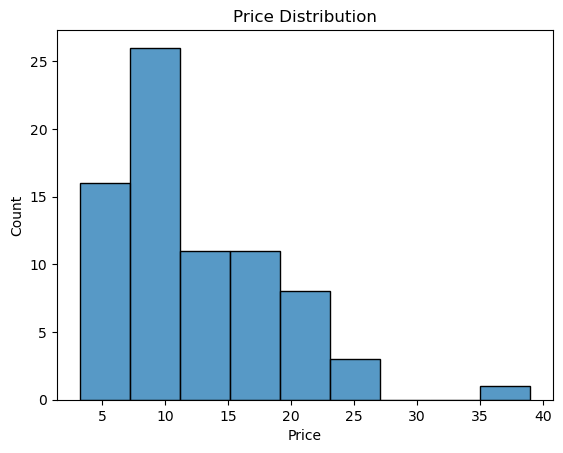

In [16]:
sns.histplot(df.Price)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

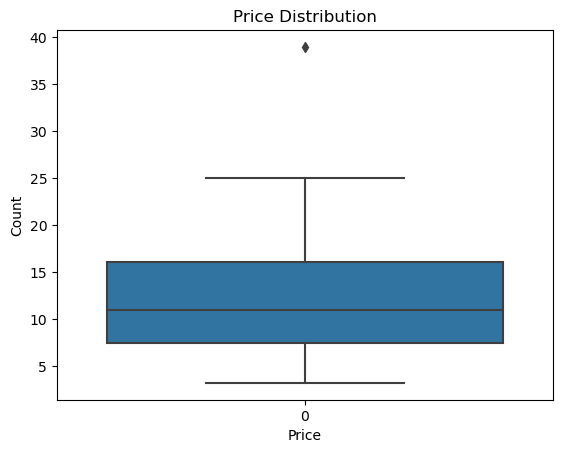

In [15]:
# distribution of the prices
sns.boxplot(df.Price)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()